In [33]:
# Load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = "data/all_mutations_VarScan_2017_tag_sig.csv"
df = pd.read_csv(DATA_PATH, skiprows=2, low_memory=False)

In [34]:
# Filter Data

# Tabla.1
df_t1 = df[df['Tabla.1'] == 'AID + t0']
t1_utr3 = df_t1[df_t1['Func..refGene'] == 'UTR3']
t1_utr5 = df_t1[df_t1['Func..refGene'] == 'UTR5']

# Tabla.2
df_t2 = df[df['Tabla.2'] == 'AID + tP']
t2_utr3 = df_t2[df_t2['Func..refGene'] == 'UTR3']
t2_utr5 = df_t2[df_t2['Func..refGene'] == 'UTR5']

# Tabla.3
df_t3 = df[df['Tabla.3'] == 'AID - t0']
t3_utr3 = df_t3[df_t3['Func..refGene'] == 'UTR3']
t3_utr5 = df_t3[df_t3['Func..refGene'] == 'UTR5']

# Tabla.4
df_t4 = df[df['Tabla.4'] == 'AID - tP']
t4_utr3 = df_t4[df_t4['Func..refGene'] == 'UTR3']
t4_utr5 = df_t4[df_t4['Func..refGene'] == 'UTR5']

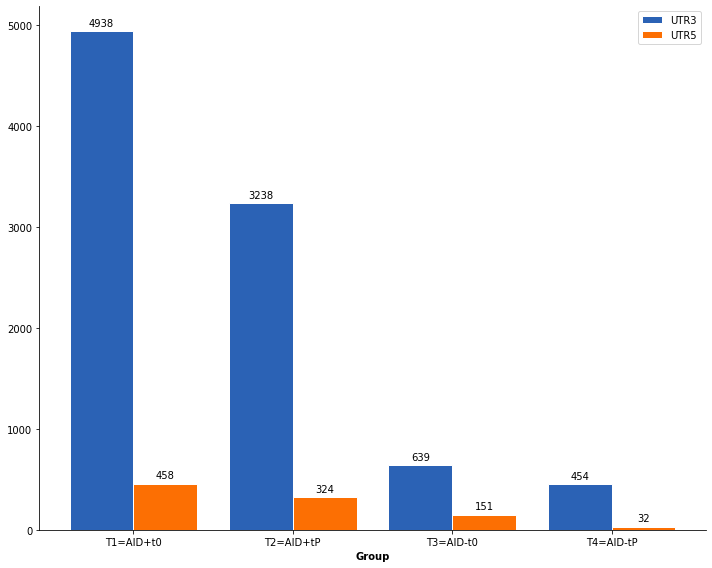

In [64]:
# Plot

fig, ax = plt.subplots(figsize=(10,8))

# set width of bar
barWidth = 0.4

# Group label
group_labels = ['T1=AID+t0', 'T2=AID+tP', 'T3=AID-t0', 'T4=AID-tP']

# Points
utr3_bars = [t1_utr3.shape[0], t2_utr3.shape[0], t3_utr3.shape[0], t4_utr3.shape[0]]
utr5_bars = [t1_utr5.shape[0], t2_utr5.shape[0], t3_utr5.shape[0], t4_utr5.shape[0]]

# Set position of bar on X axis
x = np.arange(len(group_labels)) 

# Make the plot
rects1 = ax.bar(x - barWidth/2, utr3_bars, color='#2b62b5', width=barWidth, edgecolor='white', label='UTR3')
rects2 = ax.bar(x + barWidth/2, utr5_bars, color='#fc6f03', width=barWidth, edgecolor='white', label='UTR5')

# Add xticks on the middle of the group bars
ax.set_xlabel('Group', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(group_labels)
ax.legend()

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

#fig.savefig('UTR_Count.png')
plt.show()
